## Gradient Descent Algorithm From Scratch

In [6]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### Show dataset

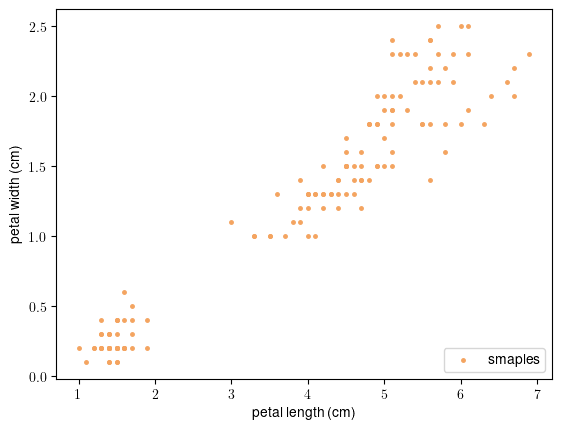

In [7]:
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

index_x = 2
index_y = 3
x = np.expand_dims(data[:,index_x],axis=1)
y = np.expand_dims(data[:,index_y],axis=1)

fig, ax = plt.subplots()
ax.scatter(data[:,index_x],data[:,index_y],color='sandybrown',marker=".", s=25,label='smaples')
plt.xlabel(feature_names[index_x])
plt.ylabel(feature_names[index_y])
plt.legend(loc='lower right')
plt.show()

### Gradient Descent Function

In [8]:
def GradientDescent(x,y,w,lr=0.01,eps=1e-2,n_loop = 10000):
    '''
    x: NxD samples;
    y: Nx1;
    lr: learning rate;
    eps: terminate condition;
    retrun: w^T = NxD
    '''
    import numpy as np
    N,D = x.shape
    i_loop = -1
    total_error = eps+1
    while (total_error>eps) and (i_loop<n_loop):
        i_loop+=1
        y_hat = np.matmul(x,w)
        y_err = y_hat-y
        total_error = 0.5*np.matmul(y_err.T,y_err)
        gradient = np.matmul(x.T,y_err)
        w = w-lr*gradient
    return w


### Apply GD on dataset and Display its effects

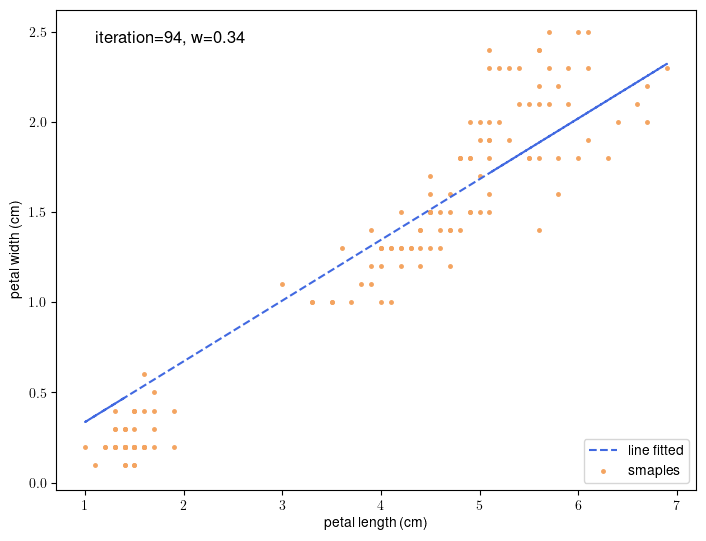

In [9]:
#initilize w
w = np.zeros((x.shape[1],1))

# create figures
fig, ax = plt.subplots()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ims = []

#Optimization loop
for i_w in np.arange(95):
    # Find w by using Gradient Desecent
    w = GradientDescent(x=x,y=y,w=w,lr=0.00005,eps=1e-2,n_loop =1)
    y_predit = np.matmul(x,w)
    # show results
    im, = ax.plot(x,y_predit,linestyle='--',color='royalblue')
    title= ax.text(0.18,0.93,r'iteration='+str(i_w)+r', w='+str(np.round(w[0][0],2)), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes, )
    ims.append([im,title])
ax.plot(x[:1],y_predit[:1],linestyle='--',color='royalblue',label='line fitted')
ax.scatter(data[:,index_x],data[:,index_y],color='sandybrown',marker=".", s=25,label='smaples')
plt.xlabel(feature_names[index_x])
plt.ylabel(feature_names[index_y])
plt.legend(loc='lower right')
ani = animation.ArtistAnimation(fig, ims, interval=250, blit=False)
ani.save("./image/GD_iris_results.gif",writer='pillow',dpi=300)
plt.show()
